In [2]:
import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt


In [3]:
# data_path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data"
data_path = "/Users/fquareng/data/"
dem_path = "dem_squares"
source_path = "1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_12_blurred/cluster_0"
target_path = "1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_12/cluster_0"


In [4]:
source_files = sorted(glob.glob(os.path.join(data_path, source_path, "8_5_lffd20191201200000_da_blurred_x8.nz")))
target_files = sorted(glob.glob(os.path.join(data_path, target_path, "8_5_lffd20191201200000_da.nz")))

print(source_files)
print(target_files)

['/Users/fquareng/data/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_12_blurred/cluster_0/8_5_lffd20191201200000_da_blurred_x8.nz']
['/Users/fquareng/data/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_12/cluster_0/8_5_lffd20191201200000_da.nz']


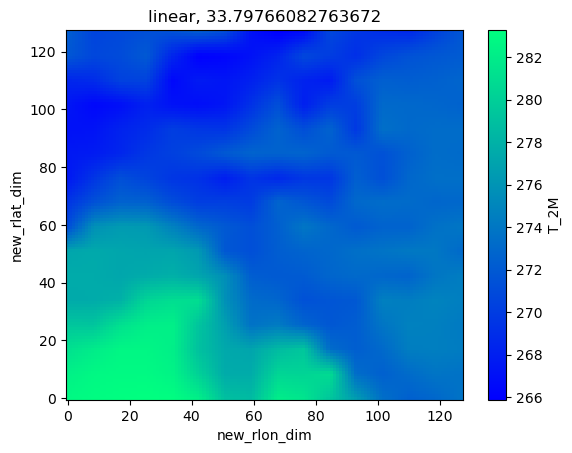

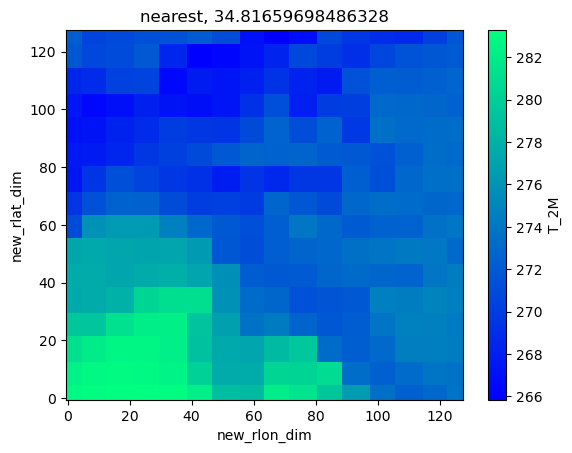

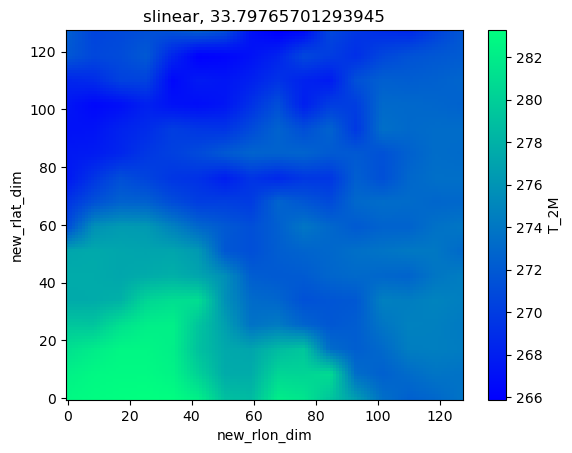

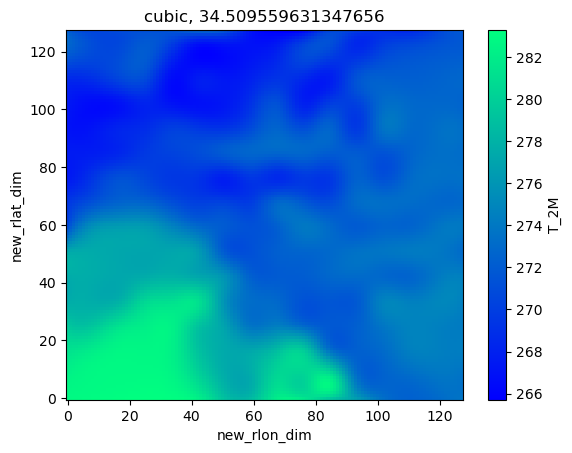

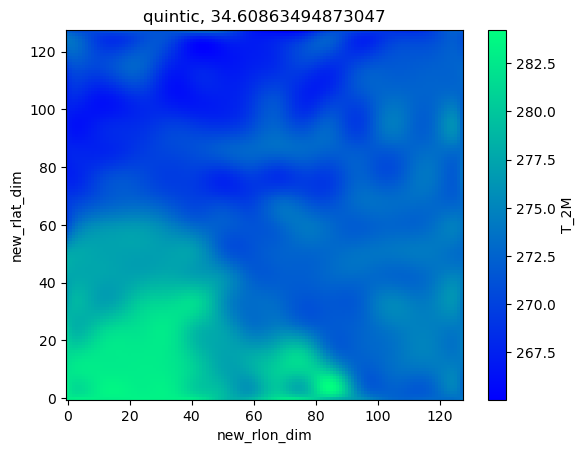

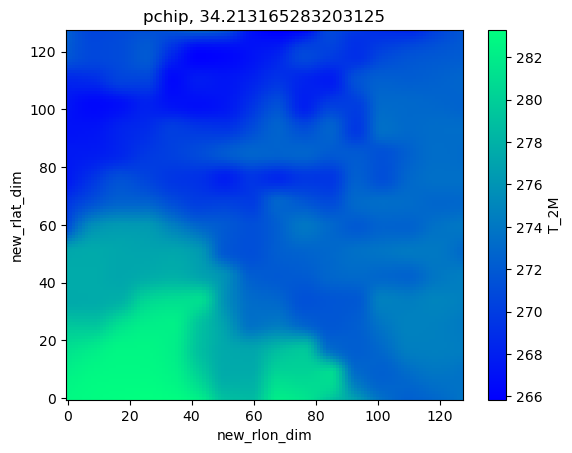

In [5]:

# Load the original NetCDF file and create variables for input data, latitude (lat), and longitude (lon)
ds = xr.open_mfdataset(source_files)
data = ds['T_2M'] 

upscale_factor = 8

# Define the number of points for each new latitude and longitude grid
num_points_x = len(ds.rlon) * upscale_factor
num_points_y = len(ds.rlat) * upscale_factor

# Create arrays for the new latitudes and longitudes using numpy's linspace()
new_rlon = np.linspace(ds.rlon.values[0], ds.rlon.values[-1], num=num_points_x)
new_rlat = np.linspace(ds.rlat.values[0], ds.rlat.values[-1], num=num_points_y)

# Create the new coordinates using xr.DataArray
new_grid = xr.Dataset(
    coords={
        'rlon': ('new_rlon_dim', new_rlon),
        'rlat': ('new_rlat_dim', new_rlat)
    }
)

methods_to_test = ["linear", "nearest", "slinear", "cubic", "quintic", "pchip"]

# Interpolate over rlon and rlat dimensions only
for method in methods_to_test:
    interpolated_ds = ds.interp(
        rlon=new_grid['rlon'],
        rlat=new_grid['rlat'],
        method=method
    )
    interpolated_ds["T_2M"].plot(cmap="winter")
    diff = data - interpolated_ds["T_2M"]
    squared_diff = diff**2
    mse = squared_diff.mean().values
    plt.title(f"{method}, {mse}")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the hex values for the colors
blue = "#0181C3"  # Blue
white = "#FFFFFF"  # White
red = "#C34301"  # Red
yellow = "#C3A403"  # Yellow

# Define a list of colors in the order of transition
colors = [blue, white, red]

# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("BlueWhiteRed", colors)


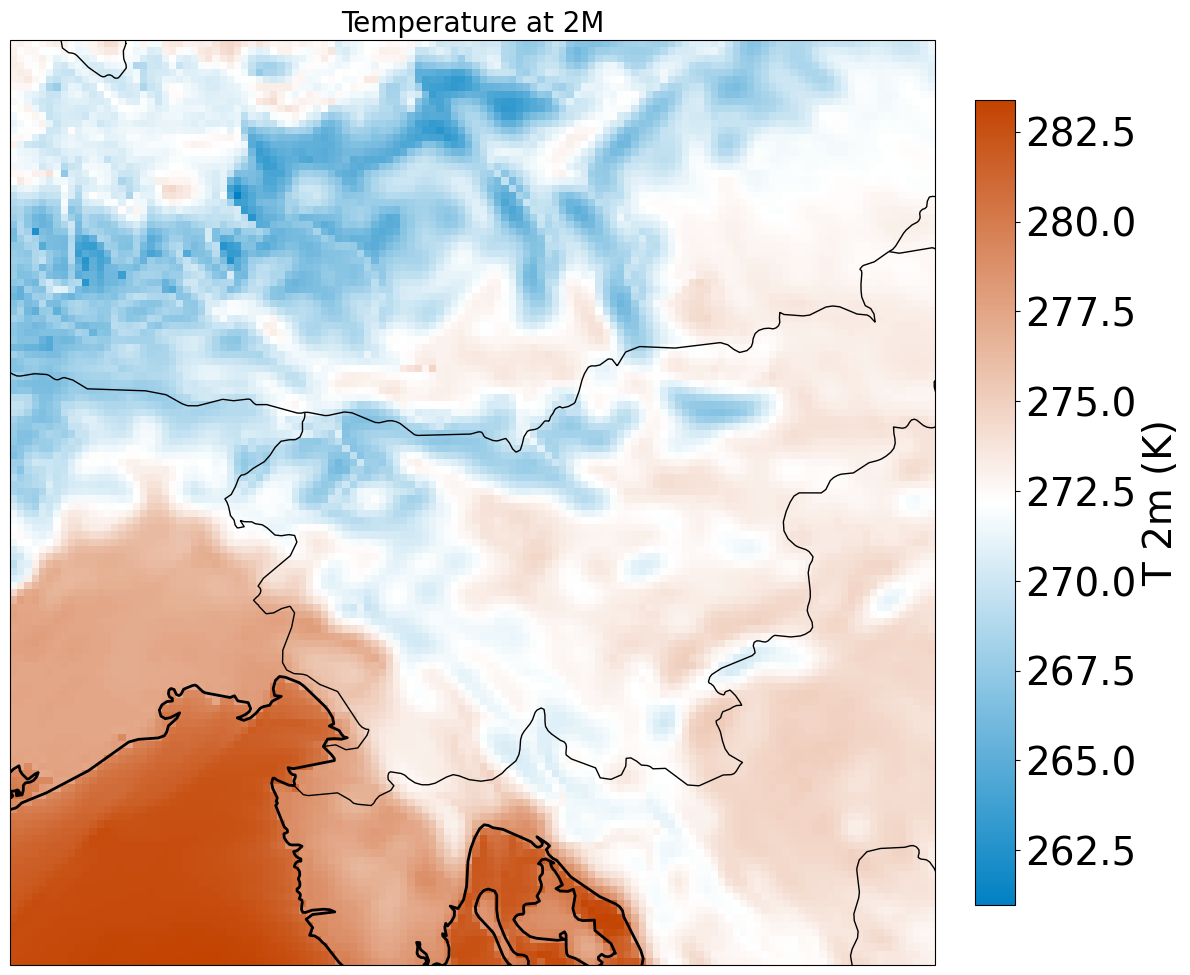

In [7]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

# Define the rotated pole projection using Cartopy
grid_north_pole_latitude = 43.0  # from your NetCDF metadata
grid_north_pole_longitude = -170.0  # from your NetCDF metadata

projection = ccrs.RotatedPole(pole_latitude=grid_north_pole_latitude, pole_longitude=grid_north_pole_longitude)

plt.figure(figsize=(12, 12))  # Adjust figure size for better resolution

ax = plt.axes(projection=projection)
ds = xr.open_mfdataset(target_files)

# Plot the temperature variable 'T_2M' with a high-quality colormap
cax = ds['T_2M'].plot(ax=ax, cmap=cmap, add_colorbar=False)

# Add high-quality map features for clarity
ax.coastlines(resolution='10m', linewidth=2)  # Use higher resolution for coastline
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')  # Add land feature

# Optionally, add gridlines for better reference
ax.gridlines(draw_labels=False, linewidth=0, color='gray', alpha=0.7)

# Add a colorbar with the same height as the plot
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', fraction=0.04, pad=0.04)
cbar.set_label("T 2m (K)", fontsize=28)
cbar.ax.tick_params(labelsize=28)



# Set title and improve spacing
plt.title("Temperature at 2M", fontsize=20)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with high resolution (dpi=500)
plt.savefig("target.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

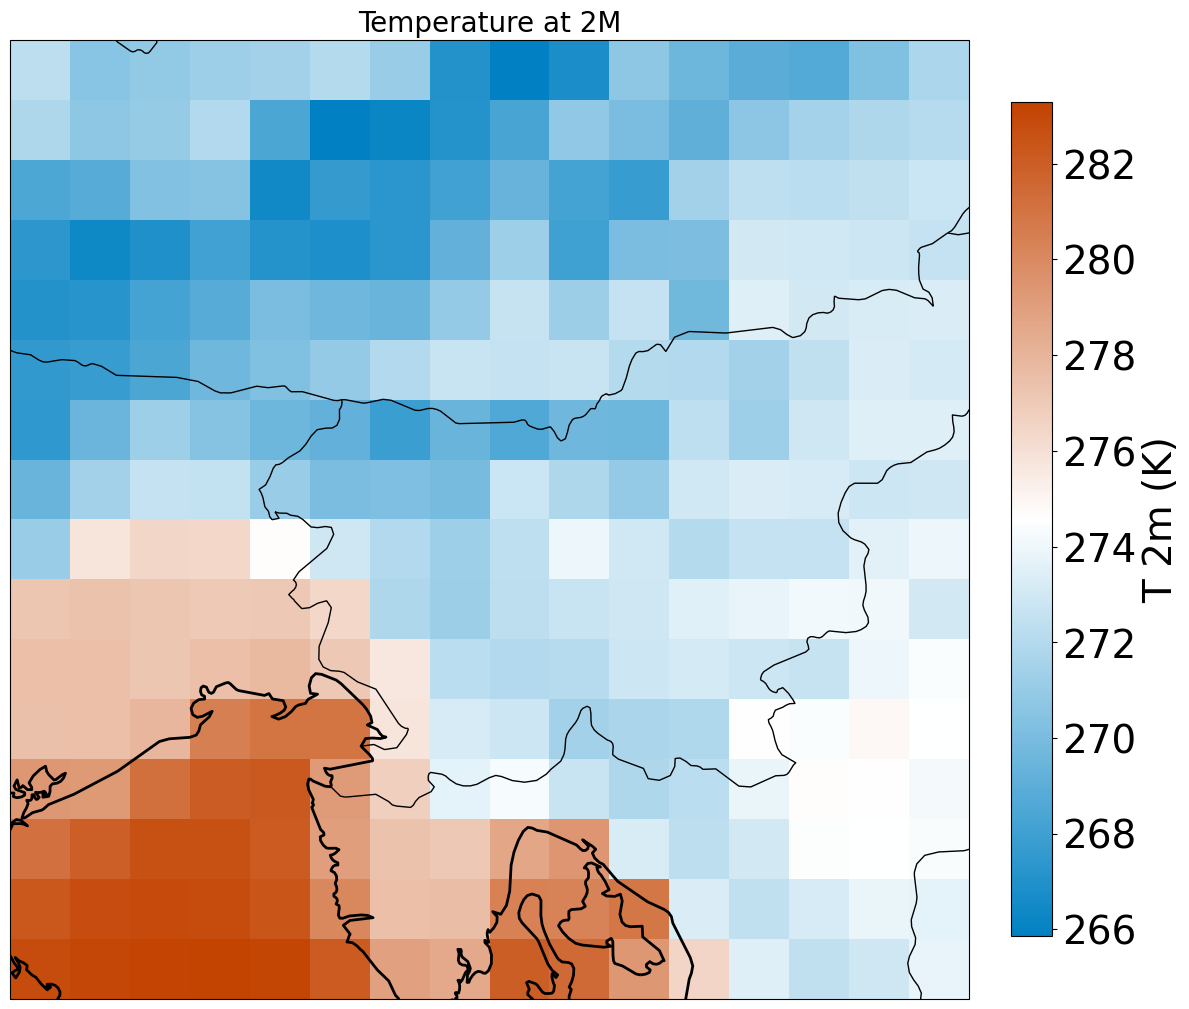

In [8]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

# Define the rotated pole projection using Cartopy
grid_north_pole_latitude = 43.0  # from your NetCDF metadata
grid_north_pole_longitude = -170.0  # from your NetCDF metadata

projection = ccrs.RotatedPole(pole_latitude=grid_north_pole_latitude, pole_longitude=grid_north_pole_longitude)

plt.figure(figsize=(12, 12))  # Adjust figure size for better resolution

ax = plt.axes(projection=projection)
ds = xr.open_mfdataset(source_files)

# Plot the temperature variable 'T_2M' with a high-quality colormap
cax = ds['T_2M'].plot(ax=ax, cmap=cmap, add_colorbar=False)

# Add high-quality map features for clarity
ax.coastlines(resolution='10m', linewidth=2)  # Use higher resolution for coastline
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')  # Add land feature

# Optionally, add gridlines for better reference
ax.gridlines(draw_labels=False, linewidth=0, color='gray', alpha=0.7)

# Add a colorbar with the same height as the plot
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', fraction=0.04, pad=0.04)
cbar.set_label("T 2m (K)", fontsize=28)
cbar.ax.tick_params(labelsize=28)



# Set title and improve spacing
plt.title("Temperature at 2M", fontsize=20)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with high resolution (dpi=500)
plt.savefig("source.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

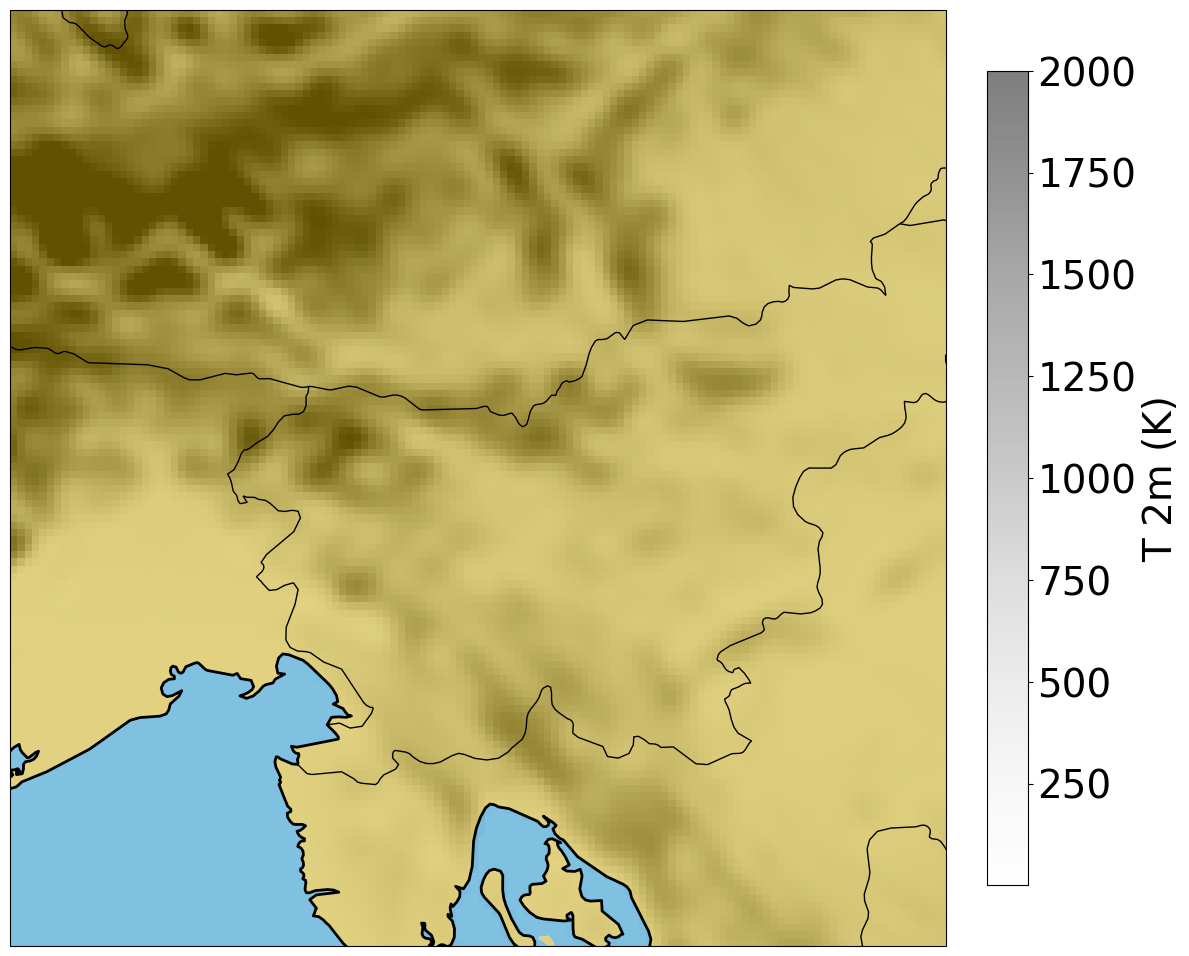

In [11]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

# Define the rotated pole projection using Cartopy
grid_north_pole_latitude = 43.0  # from your NetCDF metadata
grid_north_pole_longitude = -170.0  # from your NetCDF metadata

projection = ccrs.RotatedPole(pole_latitude=grid_north_pole_latitude, pole_longitude=grid_north_pole_longitude)

plt.figure(figsize=(12, 12))  # Adjust figure size for better resolution

ax = plt.axes(projection=projection)
ds = xr.open_mfdataset(os.path.join(data_path, "dem_squares", "8_5_*"))

# Plot the temperature variable 'T_2M' with a high-quality colormap
cax = ds['HSURF'].plot(ax=ax, cmap="Greys", add_colorbar=False, alpha=.5, vmin=1, vmax=2000)

# Add high-quality map features for clarity
ax.coastlines(resolution='10m', linewidth=2)  # Use higher resolution for coastline
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, facecolor=yellow)
ax.add_feature(cfeature.OCEAN, facecolor=blue, alpha=1)

# Optionally, add gridlines for better reference
ax.gridlines(draw_labels=False, linewidth=0, color='gray', alpha=0.7)

# Add a colorbar with the same height as the plot
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', fraction=0.04, pad=0.04)
cbar.set_label("T 2m (K)", fontsize=28)
cbar.ax.tick_params(labelsize=28)



# Set title and improve spacing
plt.title("", fontsize=20)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with high resolution (dpi=500)
plt.savefig("elev.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()